In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(DEVICE)

cuda


In [ ]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt



transform = transforms.ToTensor()
train_DS = datasets.MNIST(root = '/content/drive/MyDrive/Colab notebooks/data', train = True, download = True, transform = transform)
test_DS = datasets.MNIST(root = '/content/drive/MyDrive/Colab notebooks/data', train = False, download = True, transform = transform)

In [ ]:
print(train_DS)
print(test_DS)
print(len(train_DS))
print(len(test_DS))



Dataset MNIST
    Number of datapoints: 60000
    Root location: /content/drive/MyDrive/Colab notebooks/data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: /content/drive/MyDrive/Colab notebooks/data
    Split: Test
    StandardTransform
Transform: ToTensor()
60000
10000


In [ ]:
train_DS.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

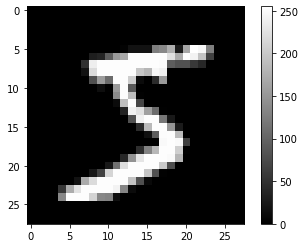

In [ ]:
plt.imshow(train_DS.data[0], cmap= "gray")
plt.colorbar()

In [ ]:
train_DS.targets[0]

tensor(5)

# DataLoader 구경

In [ ]:
BATCH_SIZE = 32
train_DL = torch.utils.data.DataLoader(train_DS, batch_size = BATCH_SIZE, shuffle = True)
test_DL = torch.utils.data.DataLoader(test_DS, batch_size = BATCH_SIZE, shuffle = True)

torch.Size([32, 1, 28, 28])
torch.Size([32])


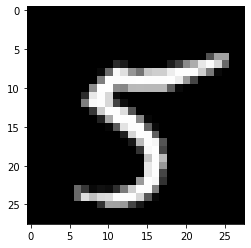

In [ ]:
images, label = next(iter(train_DL))
print(images.shape)
print(label.shape)
plt.imshow(images[0].squeeze(),cmap="gray")

In [ ]:
from torch import nn, optim
import torch.nn.functional as F

class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fcs = nn.Sequential(nn.Linear(28*28,30),
                                 nn.ReLU(), #  nn.Sigmoid(),
                                 nn.Linear(30,10))
        
    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        x = self.fcs(x)
        return x

In [ ]:
# flatten 확인
images, label = next(iter(train_DL))
print(images.shape)
flat_images=torch.flatten(images)
print(flat_images.shape)
flat_images2=torch.flatten(images, start_dim=1)
print(flat_images2.shape)

torch.Size([32, 1, 28, 28])
torch.Size([25088])
torch.Size([32, 784])


In [ ]:
model = MLP()
print(model(images).shape)

torch.Size([32, 10])


In [ ]:
from torch import optim
import torch.nn.functional as F

LR = 1e-3
EPOCH = 5


def Train(model, train_DL):
    optimizer = optim.Adam(model.parameters(), lr = LR)

    loss_history = []
    NoT = len(train_DL.dataset) # The Number of training data
    model.train() # train mode로 전환
    for ep in range(EPOCH) :
        rloss = 0
        for x_batch, y_batch in train_DL : 
            x_batch = x_batch.to(DEVICE)
            y_batch = y_batch.to(DEVICE)
            #inference
            y_hat = model(x_batch)

            # loss
            loss = F.cross_entropy(y_hat,y_batch)
                
            # update
            optimizer.zero_grad() # 초기화(위치 상관 없음)
            loss.backward() # 미분 구하기
            optimizer.step() # 수식에 의한 업데이트

            #loss accumulation
            loss_b = loss.item() * x_batch.shape[0] # batch loss # BATCH_SIZE를 곱하면 18개도 32를 곱하니깐..
            rloss+= loss_b
        # print loss
        loss_e = rloss / NoT
        loss_history += [loss_e] # item 안쓰면 tensor(0.5), 쓰면 그냥 0.5
        print(f"Epoch:{ep+1}, train loss : {round(loss_e,3)}")
        print("-"*20)
    return loss_history
            

# cross entropy 확인

In [ ]:
# cross entropy 여러가지 방법
input = torch.randn(3,5)
print(input)
target = torch.randint(5,(3,))
print(target)

F.cross_entropy(input,target)

tensor([[-1.0697,  0.2436,  0.5718, -1.1245,  0.1534],
        [ 0.9318,  1.0305,  0.3254,  0.5475,  0.4951],
        [-0.8093, -2.2346,  0.2476, -0.8334,  0.3142]])
tensor([4, 0, 0])


tensor(1.6376)